In [13]:
import torch
import matplotlib.pyplot as plt
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = "cpu"
print('Using device:', device)
print()

Using device: cpu



# Plot prediction


Training for REGIONC...

PINN


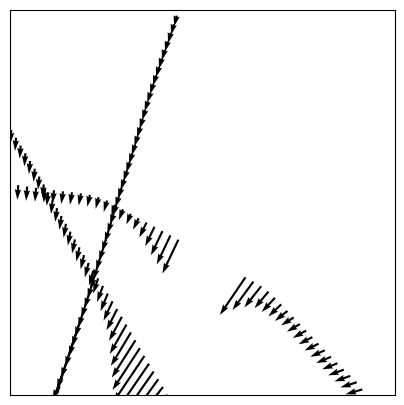


DFNN


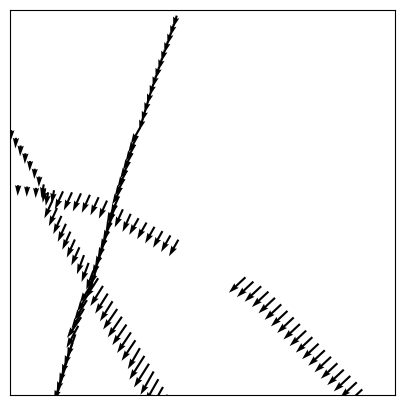


GP


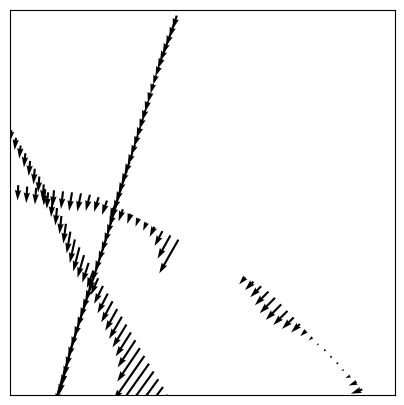


DFGP


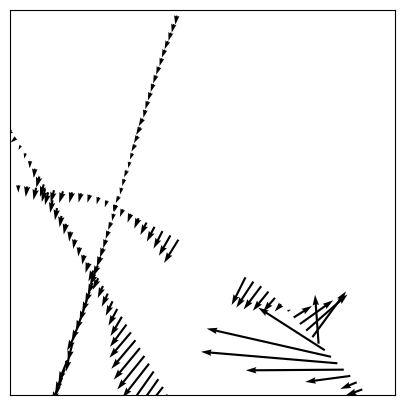


DFNGP


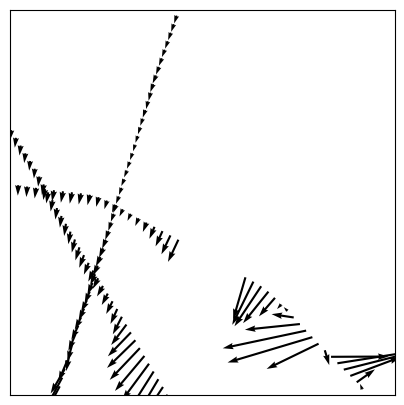

In [14]:
for region_name in ["regionc"]:

    print(f"\nTraining for {region_name.upper()}...")

    # Store metrics for the current simulation
    region_results = []

    #########################
    ### x_train & y_train ###
    #########################

    path_to_training_tensor = "data/real_data/" + region_name + "_train_tensor.pt"
    path_to_test_tensor = "data/real_data/" + region_name + "_test_tensor.pt"

    train = torch.load(path_to_training_tensor, weights_only = False).T # we need to transpose the tensor to have observations in the first dimension
    test = torch.load(path_to_test_tensor, weights_only = False).T

    # The train and test tensors have the following columns:
    # [:, 0] = x
    # [:, 1] = y
    # [:, 2] = surface elevation (s)
    # [:, 3] = ice flux in x direction (u)
    # [:, 4] = ice flux in y direction (v)
    # [:, 5] = ice flux error in x direction (u_err)
    # [:, 6] = ice flux error in y direction (v_err)

    x_train = train[:, [0, 1]].to(device).cpu()
    y_train = train[:, [3, 4]].to(device).cpu()

    x_test = test[:, [0, 1]].to(device).cpu()
    y_test = test[:, [3, 4]].to(device).cpu()

    for model_name in ["PINN", "dfNN", "GP", "dfGP", "dfNGP"]:
        print(f"\n{model_name.upper()}")

        if model_name in ["dfGP", "GP", "dfNGP"]:
            path_to_y_test_prediction = "results_byrd/" + model_name + "/" + region_name + "_" + model_name + "_test_mean_predictions.pt"
        else:
            path_to_y_test_prediction = "results_byrd/" + model_name + "/" + region_name + "_" + model_name + "_test_predictions.pt"

        y_test_prediction = torch.load(path_to_y_test_prediction, weights_only = False).to(device).detach().cpu()

        fig, ax = plt.subplots(1, 1, figsize = (5, 5))
    
        # Plot ground truth test data in black
        ax.quiver(x_test[:, 0], x_test[:, 1], y_test_prediction[:, 0], y_test_prediction[:, 1], color = "black")

        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

        # Remove axis labels
        ax.set_xticks([])
        ax.set_yticks([])
            
        ax.set_aspect("equal")

        plt.show()

# Plot prediction and gt


Training for REGIONC...

PINN


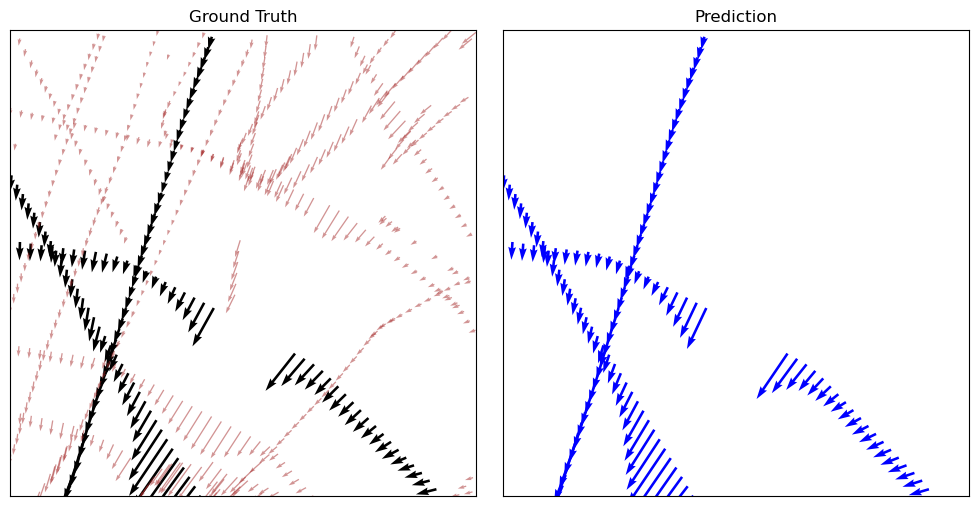


DFNN


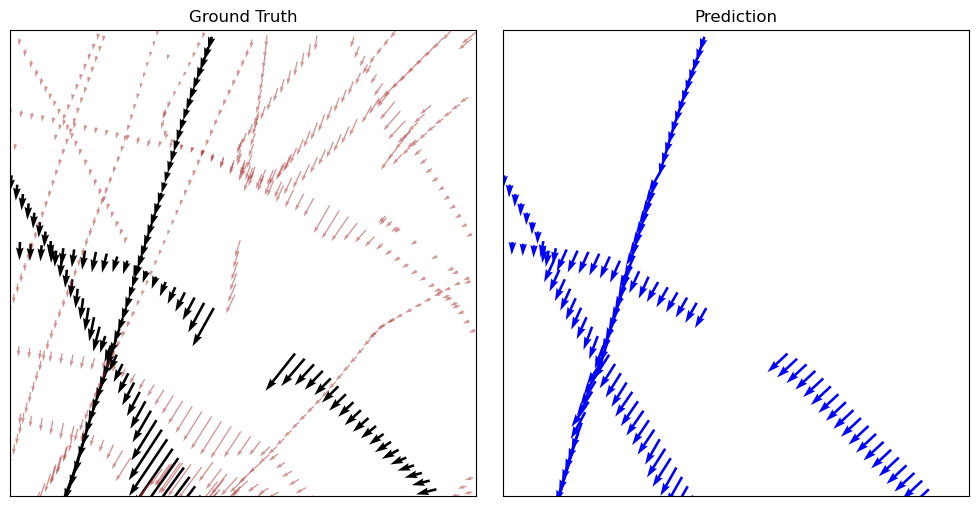


GP


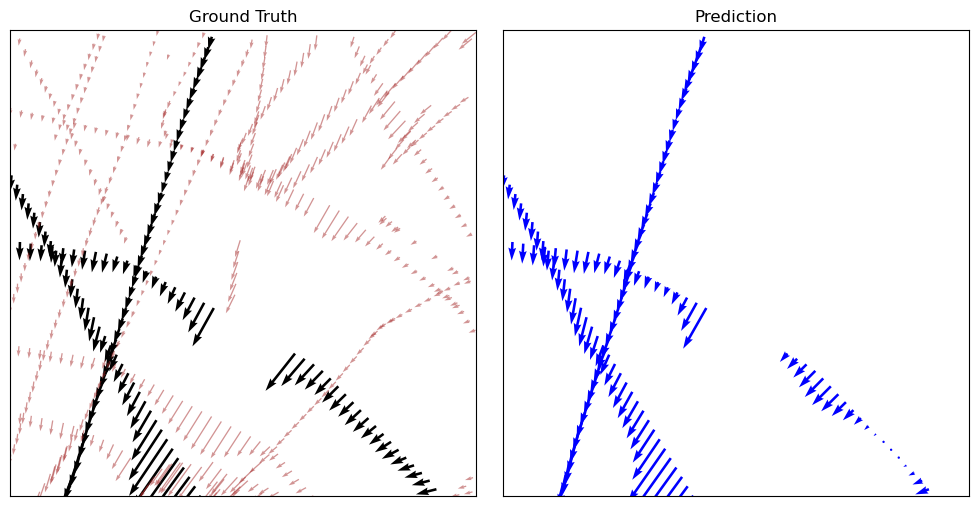


DFGP


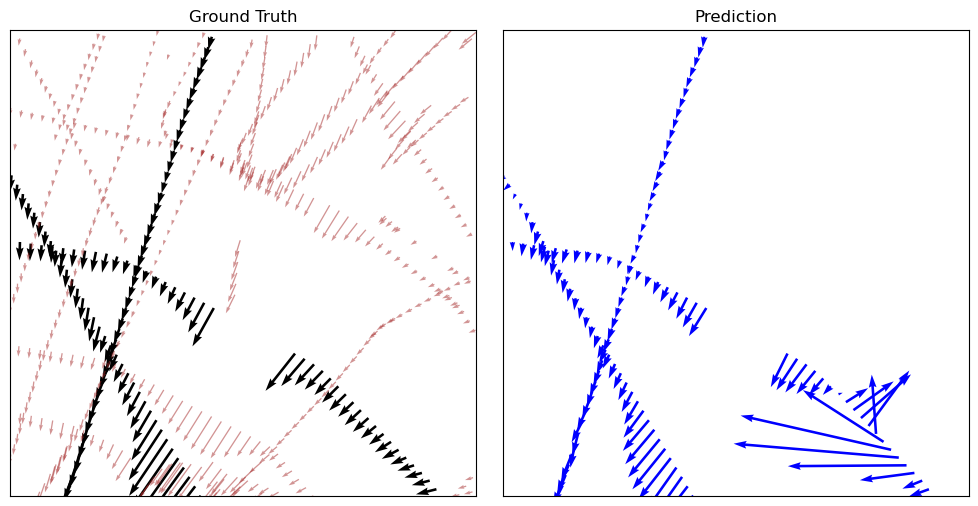


DFNGP


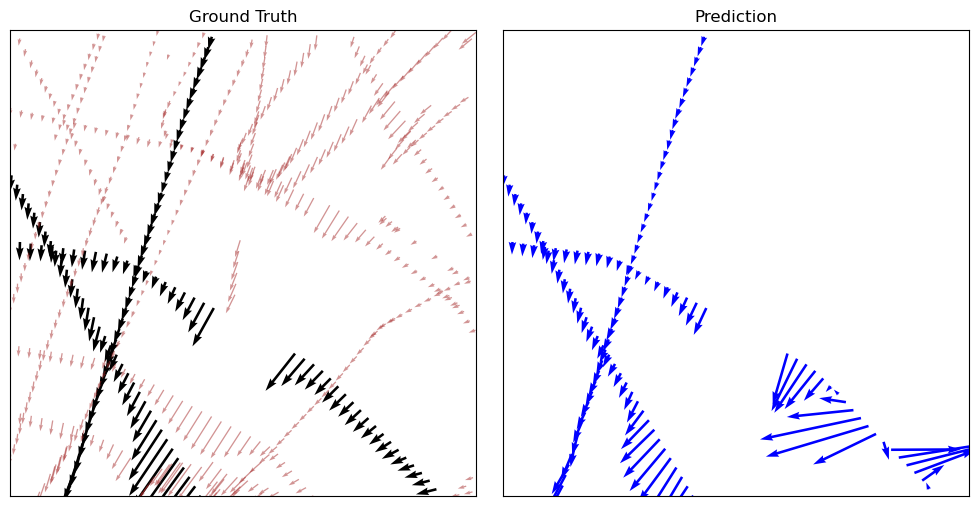

In [18]:
for region_name in ["regionc"]:

    print(f"\nTraining for {region_name.upper()}...")

    # Store metrics for the current simulation
    region_results = []

    #########################
    ### x_train & y_train ###
    #########################

    path_to_training_tensor = "data/real_data/" + region_name + "_train_tensor.pt"
    path_to_test_tensor = "data/real_data/" + region_name + "_test_tensor.pt"

    train = torch.load(path_to_training_tensor, weights_only = False).T # we need to transpose the tensor to have observations in the first dimension
    test = torch.load(path_to_test_tensor, weights_only = False).T

    # The train and test tensors have the following columns:
    # [:, 0] = x
    # [:, 1] = y
    # [:, 2] = surface elevation (s)
    # [:, 3] = ice flux in x direction (u)
    # [:, 4] = ice flux in y direction (v)
    # [:, 5] = ice flux error in x direction (u_err)
    # [:, 6] = ice flux error in y direction (v_err)

    x_train = train[:, [0, 1]].to(device).cpu()
    y_train = train[:, [3, 4]].to(device).cpu()

    x_test = test[:, [0, 1]].to(device).cpu()
    y_test = test[:, [3, 4]].to(device).cpu()

    for model_name in ["PINN", "dfNN", "GP", "dfGP", "dfNGP"]:
        print(f"\n{model_name.upper()}")

        if model_name in ["dfGP", "GP", "dfNGP"]:
            path_to_y_test_prediction = "results_byrd/" + model_name + "/" + region_name + "_" + model_name + "_test_mean_predictions.pt"
        else:
            path_to_y_test_prediction = "results_byrd/" + model_name + "/" + region_name + "_" + model_name + "_test_predictions.pt"

        y_test_prediction = torch.load(path_to_y_test_prediction, weights_only = False).to(device).detach().cpu()

        fig, axes = plt.subplots(1, 2, figsize = (10, 5))

        # --- Plot Ground Truth on the left ---
        axes[0].quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = "black")
        axes[0].quiver(x_train[:, 0], x_train[:, 1], y_train[:, 0], y_train[:, 1], color = "brown", alpha = 0.5)
        axes[0].set_title("Ground Truth")
        axes[0].set_xlim(0, 1)
        axes[0].set_ylim(0, 1)
        axes[0].set_xticks([])
        axes[0].set_yticks([])
        axes[0].set_aspect("equal")

        # --- Plot Prediction on the right ---
        axes[1].quiver(x_test[:, 0], x_test[:, 1], y_test_prediction[:, 0], y_test_prediction[:, 1], color = "blue")
        axes[1].set_title("Prediction")
        axes[1].set_xlim(0, 1)
        axes[1].set_ylim(0, 1)
        axes[1].set_xticks([])
        axes[1].set_yticks([])
        axes[1].set_aspect("equal")

        plt.tight_layout()
        plt.show()